# Solving Systems of Linear Equations

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------- #
# group number: 23
# your name(s): Carl Örnberg, Jonathan Nguyen
# --------------------------------------------------- #

## Exercise 1: Matrix manipulations.

1. Define these three matrices
$
A = \begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{pmatrix}
$
, 
$
B = \begin{pmatrix}
11 & 12 & 13\\
14 & 15 & 16\\
17 & 18 & 19
\end{pmatrix}
$
and 
$
C = \begin{pmatrix}
1 & 2\\
3 & 4\\
5 & 6
\end{pmatrix}
$

2. Use any two matrices to do i) one matrix addition, ii) one element-wise matrix multiplication and iii) one matrix multiplication.
3. What are the requirements on the matrices dimensions for these three types of operations?
4. What numpy tool returns the dimension of a matrix? Use it on matrix $A$.
5. Concatenate the matrices $A$ and $C$ along their columns and print the result. The resulting matrix's dimension should be $3\times5$

In [56]:
### BEGIN SOLUTION
# 1
A = np.array([i for i in range(1, 10)]).reshape(3, 3)
B = np.array([i for i in range(11, 20)]).reshape(3, 3)
C = np.array([i for i in range(1, 7)]).reshape(3, 2)

# 2
add_A_B = A + B
mult_element_A_B = A*B
mult_matrix_A_C = A@C

# 3
# i) The matrixes have an equal amount of rows and colums
# ii) The matrixes have an equal amount of rows and colums
# iii) The left matrix's colums has to be equal to the right matrix's rows

# 4
#The np.shape tool
size = np.shape(A)

# 5
A_C_con = np.concatenate((A, C), axis=1)

### END SOLUTION

## Exercise 2: Lower and upper triangular matrices

Run the cell below, it creates a $5\times5$ matrix called $A$ which values range from 51 to 75. See how the `numpy.arange` and `numpy.reshape` functions are used.

In [57]:
n = 5
val = 51
A = np.arange(val,val+n*n).reshape(n,n)
print(A)

[[51 52 53 54 55]
 [56 57 58 59 60]
 [61 62 63 64 65]
 [66 67 68 69 70]
 [71 72 73 74 75]]


1. With a few lines of codes, rework $A$ to create the matrices $L$ and $U$, which are the lower triangular and upper triangular parts of $A$, respectively. Do not use `numpy.tril` or `numpy.triu`. Do not write these matrices by hand. This is _not_ a LU-decomposition, which will be seen later in Exercise 4.

2. Create a function to compute $\|U\|$, which is the Euclidean norm of $U$. For a square matrix of dimension $n$, we have $\|U\| = \sqrt{\sum_{1\le i, j \le n} A_{ij}^2}$ (the square root of the sum of the square of each element). 

3. Then compute this norm again but using `numpy.linalg.norm` and show that you get the same results as with the function you wrote in the previous question.

In [58]:
### BEGIN SOLUTION
# 1
low_m = np.zeros((5, 5))
for i in range(0, np.shape(A)[0]):
    for j in range(0, np.shape(A)[1]):
        if j <= i:
            low_m[i, j] = A[i, j]

high_m = np.zeros((5, 5))
for i in range(0, np.shape(A)[0]):
    for j in range(0, np.shape(A)[1]):
        if j >= i:
            high_m[i, j] = A[i, j]

print(low_m)
print(high_m)

# 2
def norm_matrix(A):
    sum_square = 0
    for i in range(0, np.shape(A)[0]):
        for j in range(0, np.shape(A)[1]):
            sum_square += A[i, j]**2
    norm = np.sqrt(sum_square)
    return norm
   
# 3
norm_1 = norm_matrix(A)
norm_2 = np.linalg.norm(A)

if norm_1 == norm_2:
    print("Same result")
else:
    print("Different results")
### END SOLUTION

[[51.  0.  0.  0.  0.]
 [56. 57.  0.  0.  0.]
 [61. 62. 63.  0.  0.]
 [66. 67. 68. 69.  0.]
 [71. 72. 73. 74. 75.]]
[[51. 52. 53. 54. 55.]
 [ 0. 57. 58. 59. 60.]
 [ 0.  0. 63. 64. 65.]
 [ 0.  0.  0. 69. 70.]
 [ 0.  0.  0.  0. 75.]]
Same result


## Exercise 3: Condition number
1. Use `numpy.linalg.solve` to solve the system $Ax = b$ where $x$ is the unknown, 
$
A = \begin{pmatrix}
0.8647 & 0.5766\\
0.4322 & 0.2822
\end{pmatrix}
$ and 
$
b = \begin{pmatrix}
0.2885 \\
0.1442
\end{pmatrix}$. Also print $x$.
2. Compute and print the _condition number_ of $A$, which is defined as: $\|A\|  \|A^{-1}\|$. You can re-use your norm function from Exercise 2, or work with `np.linalg.norm`. Use `numpy.linalg.inv` for inverting the matrix.
3. Now add a small perturbation $p=0.0001$ to the element in the first row and first column of $A$ and solve $Ax_p = b$ for $x_p$. Compute the relative change of $x_p$ from the $x$ computed in question 1.
4. Repeat steps 1 to 3 but now using
$
A = \begin{pmatrix}
8.5 & 1.5\\
1.8 & 3.1
\end{pmatrix}$ 
(Called ```A2``` in  the code cell below) 
5. How do you interpret the condition number?

In [59]:
### BEGIN SOLUTION

# 1
print("Computations for the initial A: \n")
A = np.array([0.8647, 0.5766, 0.4322, 0.2822]).reshape(2,2)
b = np.array([0.2885, 0.1442])

x = np.linalg.solve(A, b)
print("x0 is {:.4f} and x1 is {:.7f}".format(x[0], x[1]))

# 2
A_inv = np.linalg.inv(A)
condition = norm_matrix(A)*norm_matrix(A_inv)
print("The condition is {:.4f}".format(condition))

# 3
p = 0.0001
dA = np.array([p,0, 0, 0]).reshape(2, 2)
x_p = np.linalg.solve((A + dA), b)

rel_1 = ((x[0] - x_p[0]) / x[0])*100
rel_2 = ((x[1] - x_p[1]) / x[1])*100
print("The relative changes are {:.4f}% and {:.4f}%\n".format(rel_1, rel_2))

# 4
print("Computations for the changed A: \n")

A2 = np.array([8.5, 1.5, 1.8, 3.1]).reshape(2,2)
x2 = np.linalg.solve(A2, b)
print("x0 is {:.4f} and x1 is {:.7f}".format(x2[0], x2[1]))

A_inv2 = np.linalg.inv(A2)
condition_new = norm_matrix(A2) * norm_matrix(A_inv2)
print("The condition is {:.4f}".format(condition_new))

dA2 = np.array([p,0, 0, 0]).reshape(2, 2)
x_p2 = np.linalg.solve((A2 + dA2), b)

rel_1_1 = ((x2[0] - x_p2[0]) / x2[0])*100
rel_2_2 = ((x2[1] - x_p2[1]) / x2[1])*100
print("The relative changes are {:.4f}% and {:.4f}%".format(rel_1_1, rel_2_2))


# 5
#It seems like the condition number is connected to the sensitivity of the system, and a high condition numer will result in bigger changes of x for a change in the matrix.
### END SOLUTION

Computations for the initial A: 

x0 is 0.3336 and x1 is -0.0000077
The condition is 259.5529
The relative changes are -0.5469% and -36247.7056%

Computations for the changed A: 

x0 is 0.0287 and x1 is 0.0298689
The condition is 3.6934
The relative changes are 0.0013% and -0.0007%


## Exercise 4: Matrix inversion

This exercise refers to the book _Numerical Methods in Physics with Python 1st Edition_ section 4.3.3, equation 4.147 page 164 but all details will be given here. The task is to code a **function** that performs a matrix inversion and returns the inverted matrix (questions 4.1 and 4.2). The function will be tested on the matrix $A$ (questions 4.3 and 4.4). The inverted matrix is written $A^{-1}$ and satisfies $AA^{-1} = I$, where $I$ is the identity matrix. We define $A$ as:

$
A = \begin{pmatrix}
2 & 1 & 1\\
1 & 1 & -2\\
1 & 2 & 1
\end{pmatrix}
$. 

The procedure is based on the LU decomposition. As seen in the lecture, to LU-decompose $A$ means to find $L$ and $U$ such as $A = LU$. For that, we will use the function `ludec` given below, which uses the functions `forwsub` and `backsub`, also given. These functions have also been seen in the lecture. Review how they work before using them.

In [60]:
def forwsub(L, b):
    ''' Forward substitution: solves Lx = b where x is the unknown, 
    b is known and L is known and is a lower triangular matrix'''  
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i]@x[:i])/L[i, i]
    return x

def backsub(U, b):
    ''' Backward substitution: solves Ux = b where x is the unknown, 
    b is known and U is known and is an upper triangular matrix'''  
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:]@x[i+1:])/U[i, i]
    return x
           
def ludec(A):
    ''' LU decomposition: from the input matrix A, returns L and U such that A = LU, 
    with L and U being lower and upper triangular matrices, respectively'''
    n = A.shape[0]
    U = np.copy(A)
    L = np.identity(n)
    for j in range(n-1):
        for i in range(j+1, n):
            coef = U[i, j]/U[j, j]
            U[i,j:] = U[i,j:] - U[j,j:] * coef
            L[i,j] = coef
    return L, U

### 4.1
First, LU-decompose $A$. 

### 4.2
Recall that $AA^{-1} = I$ and let's say that $x_i$ and $e_i$ are the column-vectors of $A^{-1}$ and $I$, respectively. Let's assume that the dimension of $A$ is $n$. As a result, we have: 

$A^{-1} = \begin{pmatrix} x_0 & x_1 & ... & x_i & ... & x_{n-1}\end{pmatrix}$ and  $I = \begin{pmatrix} e_0 & e_1 & ... & e_i & ... & e_{n-1}\end{pmatrix}$ 

Thus, inverting $A$ means to solve equation $Ax_i = e_i$, i.e. find $x_i$. 
Note that since $A = LU$, then you can rewrite $Ax_i = e_i$ as $L(Ux_i) = e_i$. 

Therefore, in your inversion function you will first solve $Ly_i = e_i$. Once $y_i$ is known, then proceed with solving $Ux_i = y_i$ and build $A^{-1}$.

### 4.3 
Compare your inverted matrix with the inverted matrix returned by the numpy function `numpy.linalg.inv` and show that they closely agree.

### 4.4 
Propose and implement another way to show that your inversion works (think about the equation satisfied by an inverse matrix).

In [61]:
A = np.array([2.0, 1., 1., 1, 1, -2, 1, 2, 1]).reshape(3,3)

### BEGIN SOLUTION
# 4.1 to 4.4
def invers(A):
    n = np.shape(A)[0]
    A_inv = np.zeros((n, n))
    L, U = ludec(A)
    for i in range(0, n):
        e = np.zeros((n, 1))
        e[i, 0] = 1
        y_i = forwsub(L, e)
        x_i = backsub(U, y_i)
        A_inv[:, i] = x_i
    return A_inv

A_inv_comp = invers(A)
A_inv = np.linalg.inv(A)
print("The result is {}".format(np.allclose(A_inv_comp, A_inv)))

#To show that the inversion works
I = np.eye(np.shape(A)[0])
I_comp = A@A_inv
print("The result is {}".format(np.allclose(A_inv_comp, A_inv)))
### END SOLUTION

The result is True
The result is True


C:\Users\carlo\AppData\Local\Temp\ipykernel_25508\1410490564.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = (b[i] - L[i,:i]@x[:i])/L[i, i]


## Exercise 5: Laser tracking equipment

A room is equipped with two lasers that aim at tracking the position of a person walking in it. 
Each laser follows the person and returns the equation of its ray. 
We are interested in the position of the person, that is, the position where the two lasers intersect.
At first, the two lasers are rather close to each other (just 10 cm apart).

### 5.1
The code below makes a figure that represent the room as if seen from above. Add the rays from the two lasers on the figure.

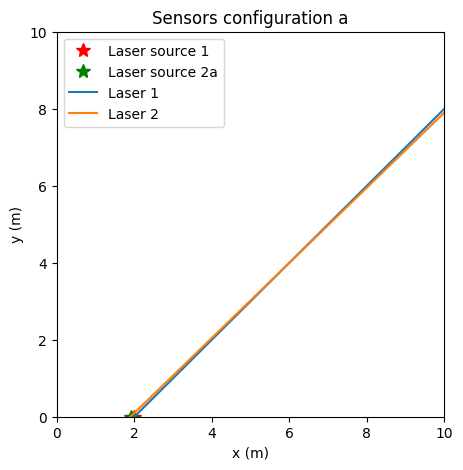

In [62]:
# Define the x axis
step = 0.1
x = np.arange(0,10+step,step)

# Lasers sources positions:
s1x, s1y = 2., 0 # laser_1
s2xa, s2ya = 1.9, 0 # laser_2 position a

# Equation for each laser
a1, b1 = 1., -2  
a2a, b2a = 4/4.1, 4-24/4.1  
y1 = a1*x +b1  # laser_1
y2a = a2a*x + b2a   # laser_2

# Figure of the room with each laser position and their rays toward the person being tracked
# The room is 10x10 m sides and seen from above. 
# The position (0,0) is the lower left corner of the room

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(s1x, s1y, 'r*', label='Laser source 1', markersize=10)
ax.plot(s2xa, s2ya, 'g*', label='Laser source 2a', markersize=10)
### BEGIN SOLUTION
# 5.1
plt.plot(x, y1, label="Laser 1")
plt.plot(x, y2a, label="Laser 2")
### END SOLUTION
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_title('Sensors configuration a')
ax.legend()
plt.show()

### 5.2
As explained, the two lasers follow the person in the room. That person is at the intersection of the two rays. 

- Think about the system of linear equations that needs to be solved to compute the coordinates of the intersection (= the position of the person tracked). Use it to declare $A$ and $k$ such that $Au=k$, where $A$ is a coefficient matrix, $k$ is a column vector and $u$ is the coordinate of the intersection, also a column vector. Only $u$ is unknown.
- Then use `np.linalg.solve` to get the person's coordinates and print it. You should find that the person is located at $x, y =6, 4$ m.

In [63]:
### BEGIN SOLUTION
# 5.2
k = np.array([-b1, -b2a]).reshape(2, 1)
A = np.array([a1, -1, a2a, -1]).reshape(2, 2)
x_s = np.linalg.solve(A, k)
ans = np.array([6, 4]).reshape(2, 1)
print("The result is {}".format(np.allclose(x_s, ans)))
### END SOLUTION

The result is True


### 5.3
Now like any real sensor, some measurement uncertainties will leak into the laser equation.
- To mimic these uncertainties, let's apply a small perturbation p = 0.001 on the two slope coefficients: $a1 + p$ and $a2a - p$ and solve the system again. 
- Compute the distance between the position in 5.2 and the one found here.
- Could you have expected this sensitivity to uncertainties. Justify quantitavely (with numbers).
- Also explain intuitively why this occurs. 
- What you would do to improve the system (no need to write it down here, just think).

In [64]:
### BEGIN SOLUTION
# 5.3
p = 0.001
a1_n = a1 + p
a2a_n = a2a - p

A_n = np.array([a1_n, -1, a2a_n, -1]).reshape(2, 2)
x_error = np.linalg.solve(A_n, k)
distance_1 = x_s - x_error
real_distance_1 = np.linalg.norm(distance_1)
print("The distance between between the real position and the modified position is {:.4f}".format(real_distance_1))

A_inv_1 = np.linalg.inv(A)
condition_1 = norm_matrix(A)*norm_matrix(A_inv_1)

print("The condition is {}".format(condition_1))

#The condition number shows that the system is very sensative which we can se in the distance between the real and modified system, this happens because¨
#the lasers are close to eachother which makes it harder to determine the exact position of the person.

### END SOLUTION

The distance between between the real position and the modified position is 0.6392
The condition is 162.024390243903


### 5.4 
Above you see what it practically means to have an ill-conditioned problem. A bad setting in a physical system leads to numerical issues.

You may have found that one solution is to move one of the lasers. We will move the second laser source 2a further away along the same wall. It's new position is now: $x, y = 8, 0$. The laser source 1 stays at the same place as before.

- Make a figure of the new configuration and lasers rays.
- Compute and print the person's position
- Apply the same perturbation p = 0.001 on the two slope coefficients: $a1 + p$ and $a2b - p$ and solve the system again. Do you have a more robust system, why? (give numbers)
- On the same figure, add a black dot where the person is located and complete the legend.

The distance between between the real position and the modified position is 0.0045


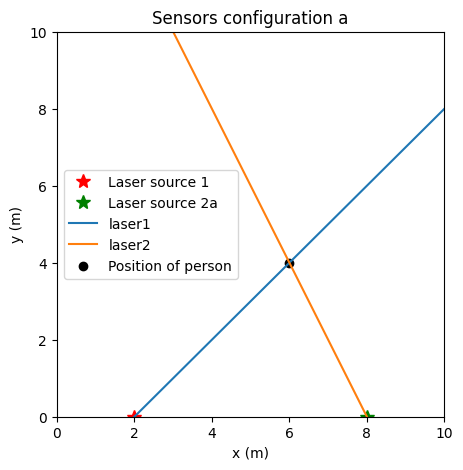

In [67]:
### BEGIN SOLUTION
# 5.4
# Let's move laser 2
s2xb, s2yb = 8, 0 # laser 2, position b
a2b, b2b = -2, 16 


#Equation from laser 2, position b
y2b = a2b*x + b2b


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(s1x, s1y, 'r*', label='Laser source 1', markersize=10)
ax.plot(s2xb, s2yb, 'g*', label='Laser source 2a', markersize=10)


plt.plot(x, y1, label="laser1")
plt.plot(x,y2b, label="laser2")


ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_title('Sensors configuration a')
ax.legend()



A_n_2 = np.array([a1, -1, a2b, -1 ]).reshape(2,2)
k_n = np.array([-b1, -b2b]).reshape(2, 1)
x_s_2 = np.linalg.solve(A_n_2, k_n)

p = 0.001
a1_p = a1 + p
a2b_p = a2b - p
A_n_error = np.array([a1_p, -1, a2b_p, -1]).reshape(2,2)
x_s_error = np.linalg.solve(A_n_error, k_n)

distance_2 = x_s_2 - x_s_error
real_distance_2 = np.linalg.norm(distance_2)
print("The distance between between the real position and the modified position is {:.4f}".format(real_distance_2))

plt.scatter(x_s_2[0], x_s_2[1], color="black", label="Position of person")
plt.legend()
plt.show()

### END SOLUTION